<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Stock_Preds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [ ]:
start = '2021-01-01'
end = '2024-01-01'
ticker = 'SPY'

df = yf.download(ticker, start=start, end=end)
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,351.674530,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,354.096588,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,356.213531,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,361.505951,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,363.565765,71677200
2021-01-11,377.850006,380.579987,377.720001,378.690002,361.114990,51034700
2021-01-12,378.890015,379.859985,376.359985,378.769989,361.191254,52547700
2021-01-13,378.690002,380.859985,377.850006,379.790009,362.163971,45303600
2021-01-14,380.589996,381.130005,378.100006,378.459991,360.895691,49989100


In [ ]:
y = df['Adj Close'].shift(1)[1:].values
X = df.drop(columns=['Adj Close']).iloc[1:].values
X.shape, y.shape

((752, 5), (752,))

In [29]:
def fit_model(x: np.ndarray, y: np.ndarray) -> None:
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def make_preds(model, x: np.ndarray) -> np.ndarray:
    x = sm.add_constant(x)
    return model.predict(x)

def score_results(y_true: np.ndarray, yhat: np.ndarray) -> tuple:
    mse = mean_squared_error(y_true, yhat)
    r2 = r2_score(y_true, yhat)
    return (mse, r2)

def plot_training(df: pd.DataFrame, y: np.ndarray, preds: np.ndarray) -> None:
    idx = df.index[:split_size]
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(idx, y, label='Real Close Price')
    ax.plot(idx, preds, label='Predictions')
    ax.set(
        xlabel='Date',
        ylabel='Price',
        title='Training predictions'
    )
    ax.legend()
    plt.show()

def plot_validation(df: pd.DataFrame, y: np.ndarray, preds: np.ndarray) -> None:
    idx = df.index[split_size:]
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(idx, y, label='Real Close Price')
    ax.plot(idx, preds, label='Predictions')
    ax.set(
        xlabel='Date',
        ylabel='Price',
        title='Validation predictions'
    )
    ax.legend()
    plt.show()

def plot_testing(df: pd.DataFrame, y: np.array, preds: np.array) -> None:
    idx = df.index
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(idx, y, label='Real Close Price')
    ax.plot(idx, preds, label='Predictions')
    ax.set(
        xlabel='Date',
        ylabel='Price',
        title='Test predictions'
    )
    ax.legend()
    plt.show()

In [ ]:
split_size = int(0.8 * X.shape[0])
x_train, x_valid = X[:split_size], X[split_size:]
y_train, y_valid = y[:split_size], y[split_size:]
x_train.shape, x_valid.shape

((601, 5), (151, 5))

In [ ]:
model = fit_model(x_train, y_train)
preds = make_preds(model, x_train)
score_results(y_train, preds)

(21.151706765048708, 0.9696727437750824)

In [ ]:
futures = make_preds(model, x_valid)
score_results(y_valid, futures)

(130.79652102052452, 0.41474512827086507)

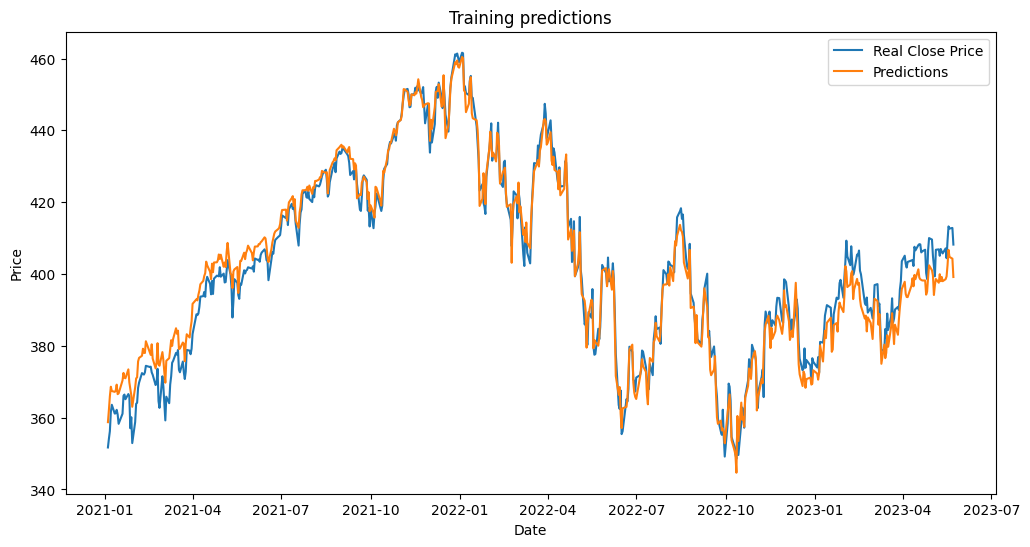

In [ ]:
plot_training(df, y_train, preds)

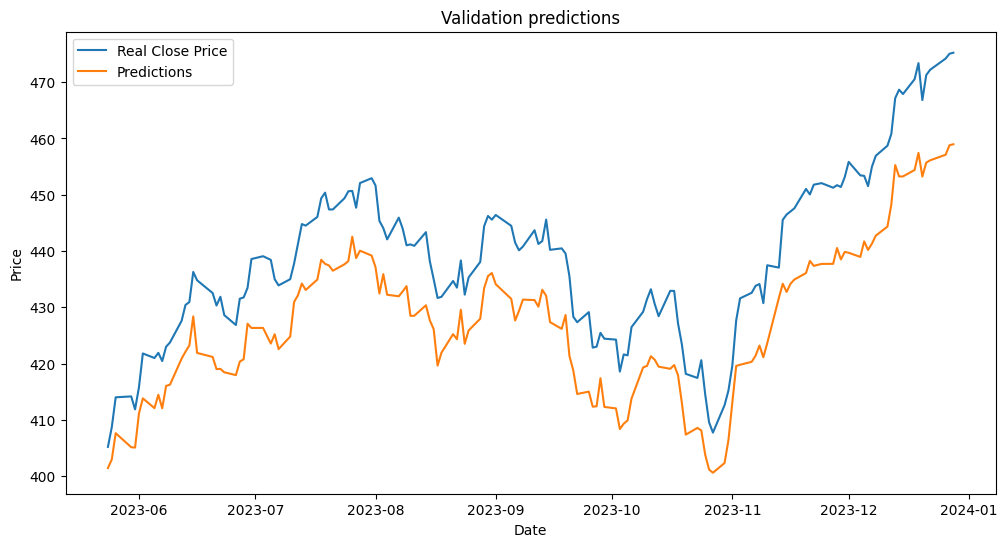

In [ ]:
plot_validation(df[:-1], y_valid, futures)

In [ ]:
start = '2024-01-01'
ticker = 'SPY'

test = yf.download(ticker, start=start)
test

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,472.160004,473.670013,470.489990,472.649994,471.186005,123623700
2024-01-03,470.429993,471.190002,468.170013,468.790009,467.337982,103585900
2024-01-04,468.299988,470.959991,467.049988,467.279999,465.832642,84232200
2024-01-05,467.489990,470.440002,466.429993,467.920013,466.470673,86060800
2024-01-08,468.429993,474.750000,468.299988,474.600006,473.129974,74879100
...,...,...,...,...,...,...
2024-05-22,530.650024,531.380005,527.599976,529.830017,529.830017,48390000
2024-05-23,532.960022,533.070007,524.719971,525.960022,525.960022,57211200
2024-05-24,527.849976,530.270020,526.880005,529.440002,529.440002,41258400


In [ ]:
x_test = test.drop(columns=['Adj Close']).values
y_test = test['Adj Close'].values
test_preds = make_preds(model, x_test)

In [ ]:
mse, r2 = score_results(y_test, test_preds)
print(f'RMSE: {np.sqrt(mse)}')

RMSE: 19.9724335289323


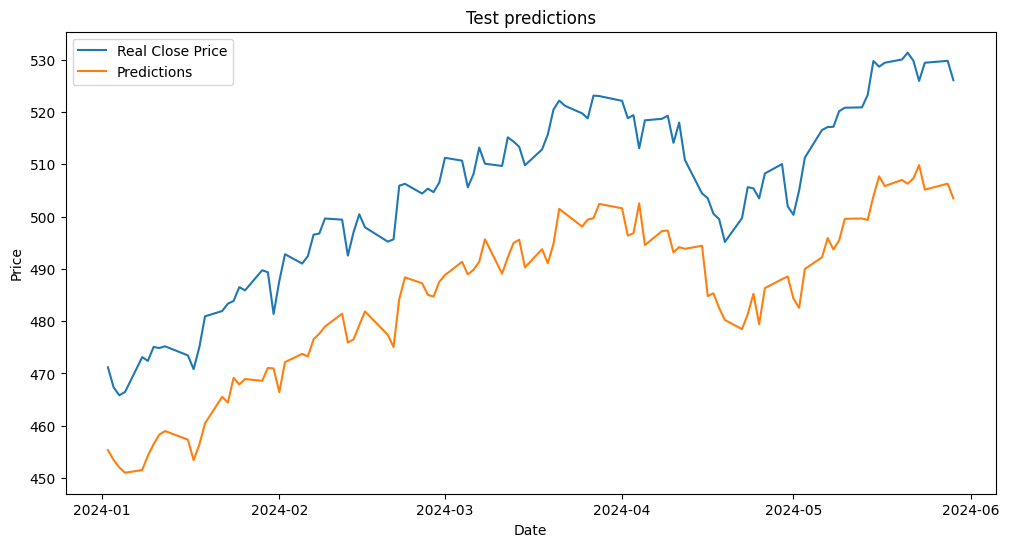

In [ ]:
plot_testing(test, y_test, test_preds)

## Scale the data and determine if the model improves for validation and testing

### Standardize data

In [ ]:
def standardize(data: np.array) -> np.array:
    '''
    Using multiple features and need to take the mean across the columns
    and same for the standard deviation.
    '''

    mu = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mu) / std

def minmax(data: np.array) -> np.array:
    max_value = data.max(axis=0)
    min_value = data.min(axis=0)

    return (data - min_value) / (max_value - min_value)

RMSE: 4.5991, R2 Score: 0.9697


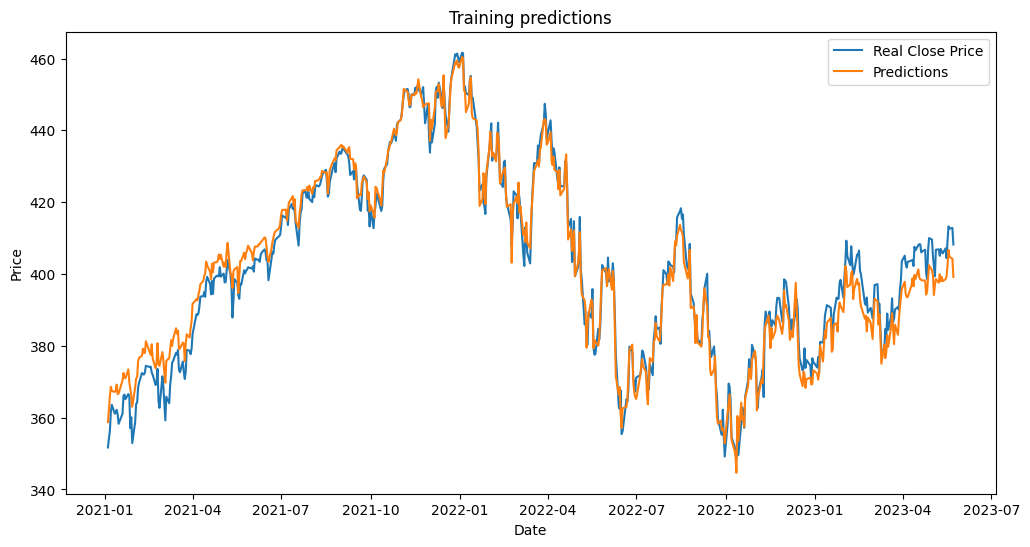

In [ ]:
X_std = standardize(X)

x_train, x_valid = X_std[:split_size], X_std[split_size:]
y_train, y_valid = y[:split_size], y[split_size:]

model = fit_model(x_train, y_train)
preds = make_preds(model, x_train)
mse, r2 = score_results(y_train, preds)
print(f'RMSE: {np.sqrt(mse):0.4f}, R2 Score: {r2:0.4f}')

plot_training(df, y_train, preds)

RMSE: 11.4366, R2 Score: 0.4147


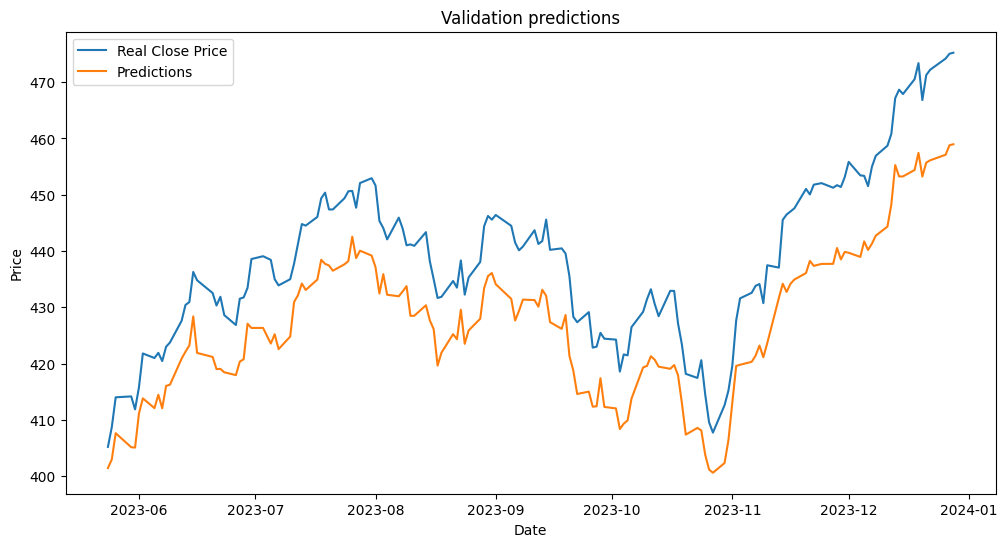

In [ ]:
futures = make_preds(model, x_valid)
mse, r2 = score_results(y_valid, futures)
print(f'RMSE: {np.sqrt(mse):0.4f}, R2 Score: {r2:0.4f}')

plot_validation(df[:-1], y_valid, futures)

### Using percent change for the features

RMSE: 26.2234, R2 Score: 0.0080


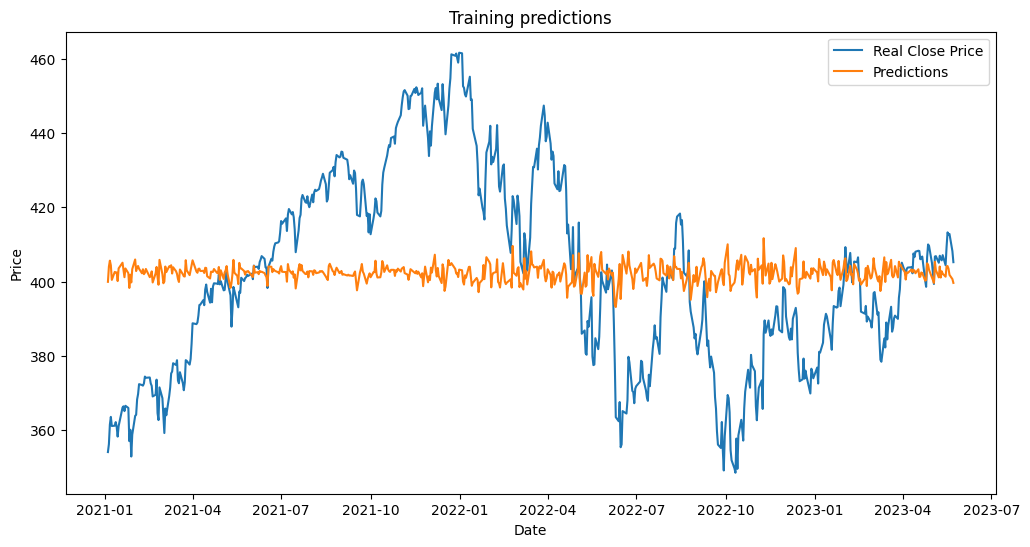

In [ ]:
returns = df.pct_change()[1:]
X = returns[['Open', 'High', 'Low', 'Close']].values
y = df['Adj Close'][1:].values

x_train, x_valid = X[:split_size], X[split_size:]
y_train, y_valid = y[:split_size], y[split_size:]

model = fit_model(x_train, y_train)
preds = make_preds(model, x_train)
mse, r2 = score_results(y_train, preds)
print(f'RMSE: {np.sqrt(mse):0.4f}, R2 Score: {r2:0.4f}')

plot_training(df, y_train, preds)

### Minmax scaling

RMSE: 3.7520, R2 Score: 0.9798


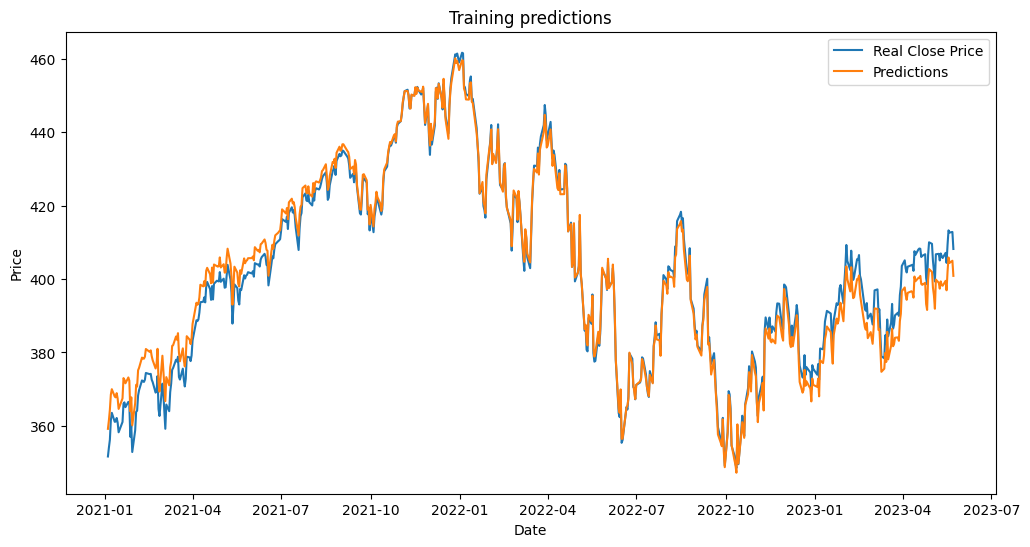

In [ ]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = df['Adj Close'].values
X_scaled = minmax(X)

x_train, x_valid = X_scaled[:split_size], X_scaled[split_size:]
y_train, y_valid = y[:split_size], y[split_size:]

model = fit_model(x_train, y_train)
preds = make_preds(model, x_train)
mse, r2 = score_results(y_train, preds)
print(f'RMSE: {np.sqrt(mse):0.4f}, R2 Score: {r2:0.4f}')

plot_training(df, y_train, preds)

RMSE: 11.6355, R2 Score: 0.4120


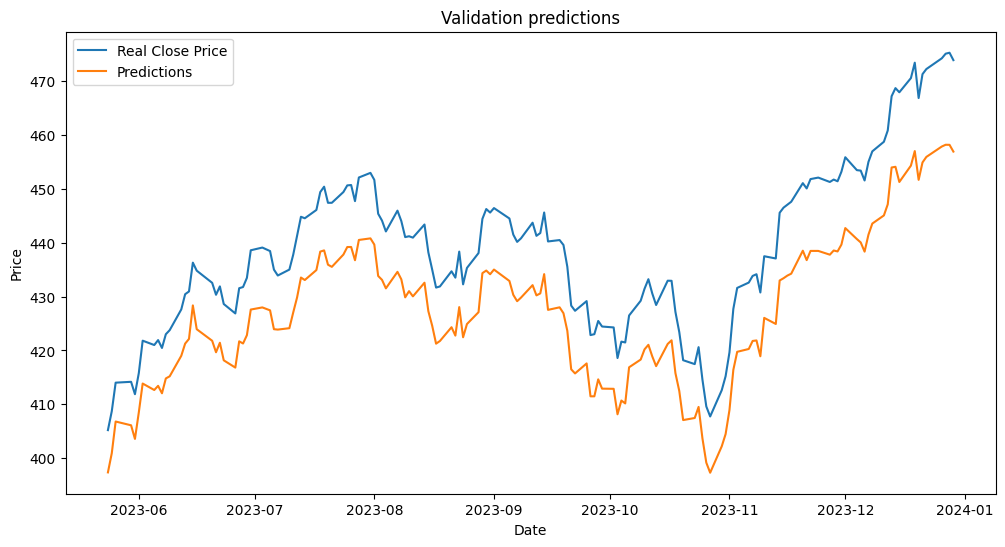

In [ ]:
futures = make_preds(model, x_valid)
mse, r2 = score_results(y_valid, futures)
print(f'RMSE: {np.sqrt(mse):0.4f}, R2 Score: {r2:0.4f}')

plot_validation(df, y_valid, futures)

### Issues with Data leakage??

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

In [36]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=123
)

std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_valid_scaled = std_scaler.transform(x_valid)

In [37]:
model = fit_model(x_train_scaled, y_train)
train_preds = make_preds(model, x_train_scaled)
mse, r2 = score_results(y_train, train_preds)
print('Training')
print('RMSE', np.sqrt(mse))
print('R2', r2)

valid_preds = make_preds(model, x_valid_scaled)
mse, r2 = score_results(y_valid, valid_preds)
print('\nValidation')
print('RMSE', np.sqrt(mse))
print('R2', r2)

Training
RMSE 4.0399012566145345
R2 0.976560854847133

Validation
RMSE 11.537983984640286
R2 0.4065315841692986


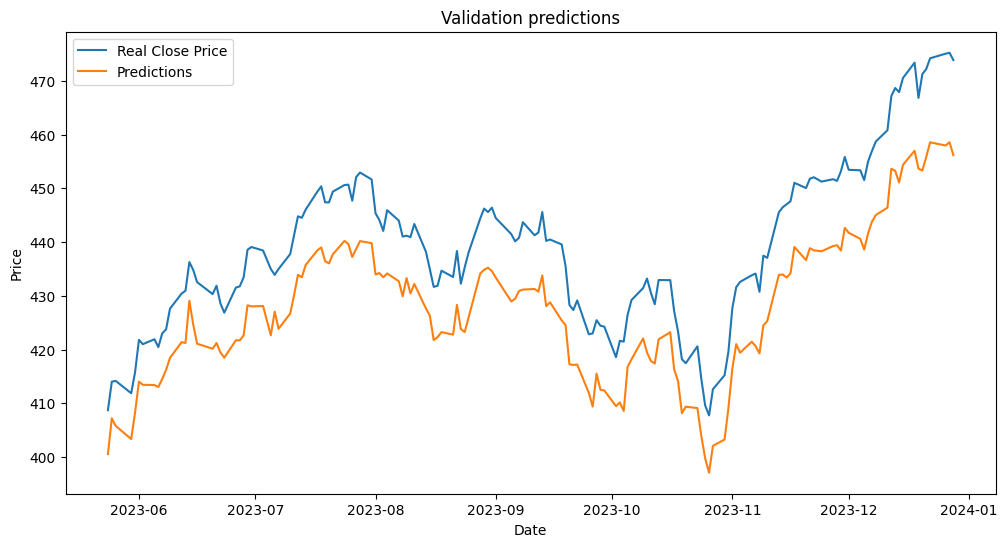

In [51]:
plot_validation(X.iloc[:-1], y_valid, valid_preds)